# Linear Regression 

In [ ]:
import pandas as pd
import statsmodels.api as sm
import unicodedata

wins_df = pd.read_csv("../data/NBATrackingDataWins24-25_per36.csv")
losses_df = pd.read_csv("../data/NBATrackingDataLosses24-25_per36.csv")

# Define Superstar and Secondary Star lists
superstars = [
    "Luka Doncic", "Giannis Antetokounmpo", "Nikola Jokic",
    "Jayson Tatum", "Shai Gilgeous-Alexander", "Stephen Curry",
    "LeBron James", "Kevin Durant", "Joel Embiid", "Anthony Davis",
    "Anthony Edwards", "Jalen Brunson", "Victor Wembanyama",
    "Devin Booker", "Kawhi Leonard", "Trae Young", "Donovan Mitchell"
]

secondary_stars = [
    "Jaylen Brown", "Jimmy Butler III", "De'Aaron Fox",
    "Kyrie Irving", "Ja Morant", "Zion Williamson", "Bam Adebayo",
    "Pascal Siakam", "Brandon Ingram", "Domantas Sabonis", "Karl-Anthony Towns",
    "Jamal Murray", "Darius Garland", "Damian Lillard", "Jalen Williams",
    "Paul George", "Scottie Barnes", "Paolo Banchero", "Tyrese Haliburton",
    "Tyrese Maxey", "Lauri Markkanen", "Mikal Bridges", "Franz Wagner",
    "Desmond Bane", "Chet Holmgren", "Kristaps Porzingis", "Jrue Holiday",
    "Dejounte Murray"
]

# Function to strip accents
def remove_accents(name):
    if isinstance(name, str):
        return ''.join(
            c for c in unicodedata.normalize('NFD', name)
            if unicodedata.category(c) != 'Mn'
        )
    return name

# Categorize players in both datasets 
def categorize_by_name(player):
    if player in superstars:
        return "Superstar"
    elif player in secondary_stars:
        return "Secondary Star"
    else:
        return "Role Player"

# Apply to both datasets
wins_df["PLAYER"] = wins_df["PLAYER"].apply(remove_accents)
losses_df["PLAYER"] = losses_df["PLAYER"].apply(remove_accents)

wins_df["Tier"] = wins_df["PLAYER"].apply(categorize_by_name)
losses_df["Tier"] = losses_df["PLAYER"].apply(categorize_by_name)

wins_df["Tier"].value_counts()


Tier
Role Player       502
Secondary Star     28
Superstar          17
Name: count, dtype: int64

In [ ]:
# Define predictors and dependent variables
predictors = ['DRIVES_Per36', 'AST_Per36', 'FGA_Per36', 'FTA_Per36', 'PASS_Per36', 'TO_Per36']
target = 'PTS_Per36'

# Function to run regression for each tier
def run_regression_by_tier(df, predictors, target):
    results = {}
    for tier in df['Tier'].unique():
        tier_df = df[df['Tier'] == tier]
        X = tier_df[predictors]
        y = tier_df[target]
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        results[tier] = model
        print(f"\n=== {tier} ===")
        print(model.summary())
    return results

print("=== Wins Dataset ===")
wins_models = run_regression_by_tier(wins_df, predictors, target) 

=== Wins Dataset ===

=== Role Player ===
                            OLS Regression Results                            
Dep. Variable:              PTS_Per36   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     411.5
Date:                Thu, 06 Nov 2025   Prob (F-statistic):          9.12e-189
Time:                        18:13:58   Log-Likelihood:                -723.07
No. Observations:                 502   AIC:                             1460.
Df Residuals:                     495   BIC:                             1490.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const 

In [9]:
print("=== Losses Dataset ===")
losses_models = run_regression_by_tier(losses_df, predictors, target) 

=== Losses Dataset ===

=== Role Player ===
                            OLS Regression Results                            
Dep. Variable:              PTS_Per36   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     306.5
Date:                Thu, 06 Nov 2025   Prob (F-statistic):          3.98e-163
Time:                        18:31:59   Log-Likelihood:                -806.35
No. Observations:                 502   AIC:                             1627.
Df Residuals:                     495   BIC:                             1656.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cons

# Visualization 

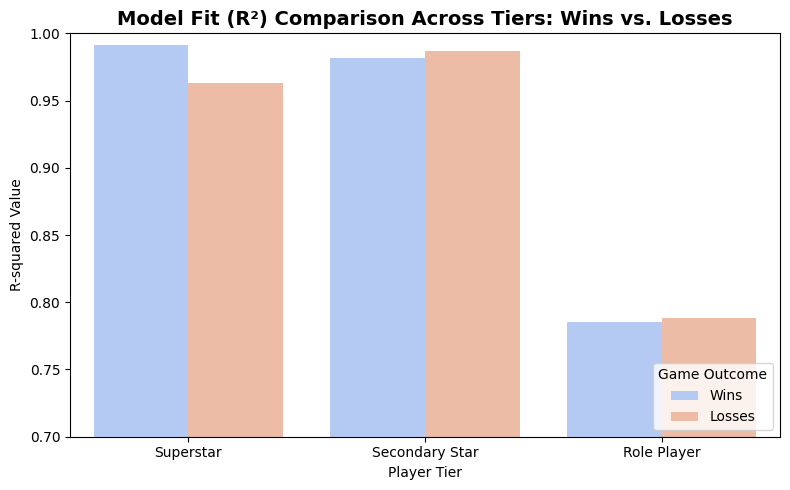

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data setup
r2_data = pd.DataFrame({
    'Tier': ['Superstar', 'Superstar', 'Secondary Star', 'Secondary Star', 'Role Player', 'Role Player'],
    'Context': ['Wins', 'Losses', 'Wins', 'Losses', 'Wins', 'Losses'],
    'R_squared': [0.991, 0.963, 0.982, 0.987, 0.785, 0.788]
})

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(data=r2_data, x='Tier', y='R_squared', hue='Context', palette='coolwarm')
plt.title('Model Fit (R²) Comparison Across Tiers: Wins vs. Losses', fontsize=14, weight='bold')
plt.ylim(0.7, 1.0)
plt.ylabel('R-squared Value')
plt.xlabel('Player Tier')
plt.legend(title='Game Outcome', loc='lower right')
plt.tight_layout()
plt.show()

## Comparative Regression Analysis: Wins vs. Losses (By Player Tier)

This section compares the **OLS regression results** for each player tier — *Superstars*, *Secondary Stars*, and *Role Players* — across **wins** and **losses**. The dependent variable in all models is `PTS_Per36`, with predictors including Drives, Assists, Field Goal Attempts (FGA), Free Throw Attempts (FTA), Passes, and Turnovers — all standardized per 36 minutes.

---

### **Superstars**

| Context | R² | Adj. R² | Significant Predictors (p < 0.05) | Notable Insights |
|----------|----|----------|-----------------------------------|------------------|
| **Wins** | 0.991 | 0.985 | **FTA_Per36 (+)** | Scoring for Superstars in wins is almost entirely explained by the model. Free throw attempts are the strongest positive predictor, suggesting that aggressiveness and drawing fouls contribute directly to winning outcomes. |
| **Losses** | 0.963 | 0.940 | *Marginal:* FTA_Per36 (p ≈ 0.068) | The model remains strong, but slightly weaker than in wins. In losses, the relationship between scoring and metrics like drives or assists becomes less stable. Superstar scoring is less predictable — perhaps due to defenses focusing more heavily on them. |

**Key Takeaway:**  
Superstars’ efficiency and scoring patterns are more consistent in wins. In losses, their output is still driven by similar factors but exhibits more variability, possibly due to situational factors like defensive pressure or team inefficiency.

---

### **Secondary Stars**

| Context | R² | Adj. R² | Significant Predictors (p < 0.05) | Notable Insights |
|----------|----|----------|-----------------------------------|------------------|
| **Wins** | 0.982 | 0.977 | **Drives_Per36 (+)**, **PASS_Per36 (–)**, **TO_Per36 (–)** | Drives per 36 are strongly associated with scoring in wins, while more passes and turnovers correspond with lower point output — suggesting that when secondary stars focus on scoring rather than distribution, team success improves. |
| **Losses** | 0.987 | 0.984 | **FTA_Per36 (+)** | The model slightly improves in losses, but only free throw attempts remain significant. Secondary stars may try to draw fouls more when trailing, though it’s not always enough to secure wins. |

**Key Takeaway:**  
Secondary stars contribute most efficiently to scoring in wins when they are assertive (high drives) and limit turnovers. In losses, their scoring becomes reliant on free throws, suggesting a more reactive offensive role.

---

### **Role Players**

| Context | R² | Adj. R² | Significant Predictors (p < 0.05) | Notable Insights |
|----------|----|----------|-----------------------------------|------------------|
| **Wins** | 0.785 | 0.781 | **FGA_Per36 (+)**, **FTA_Per36 (+)**, **PASS_Per36 (+)** | In wins, role players contribute via efficient shooting and activity — their scoring is tied to shot attempts and movement within the offense. |
| **Losses** | 0.788 | 0.785 | **DRIVES_Per36 (–)**, **AST_Per36 (–)**, **FGA_Per36 (+)**, **FTA_Per36 (+)**, **PASS_Per36 (+)**, **TO_Per36 (+)** | Model stability is similar, but the sign of several coefficients shifts. Negative coefficients on drives and assists suggest less effective or forced offensive actions during losses. |

**Key Takeaway:**  
Role players remain consistent contributors, but in losses, their drives and assists negatively correlate with scoring — possibly reflecting less cohesive offensive systems or inefficient shot creation when the team is behind.

---

### **Overall Insights**

1. **Model Strength:**  
   - All tiers show extremely high R² values, particularly for Superstars and Secondary Stars, indicating strong model fit.  
   - Role players’ models (~0.78 R²) are still robust but more variable due to greater sample diversity and role flexibility.

2. **Performance Stability:**  
   - Superstars are the most consistent between wins and losses — their output is largely driven by free throw generation and shooting volume.  
   - Secondary stars are more situational, thriving when assertive (drives) but limited when reliant on free throws in losses.  
   - Role players’ performance appears most sensitive to game context, reflecting dependence on system and opportunity.

3. **Tactical Implications:**  
   - Teams win when Superstars and Secondary Stars convert aggression (FTA, drives) into efficient scoring, while Role Players complement through active shot-taking and movement.  
   - Losses tend to reveal breakdowns in efficiency — turnovers rise, drives lose value, and assists become less predictive of scoring success.

---

**Summary:**  
These regression results highlight a clear behavioral and structural difference between player tiers. Winning performance aligns with assertiveness and efficient shot creation, while losses reveal a shift toward reactive or inefficient tendencies, especially among non-superstars. This segmentation provides actionable insight into how player roles and play styles correlate with team outcomes.
